In [ ]:
import pandas as pd

# Cargar archivo
from google.colab import files
uploaded = files.upload()

# Leer archivo CSV
df = pd.read_csv("city_day.csv")

# Mostrar las primeras filas
df.head()

Saving city_day.csv to city_day.csv


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [ ]:
# Shape of the dataset (rows, columns)
df.shape


(29531, 16)

In [ ]:
# Dataset info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [ ]:
# Descriptive statistics
df.describe()


,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


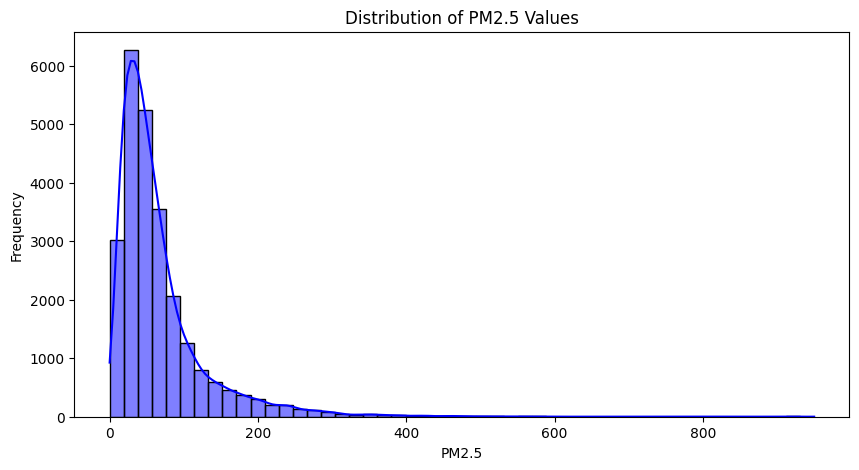

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(df['PM2.5'], bins=50, kde=True, color='blue')
plt.title('Distribution of PM2.5 Values')
plt.xlabel('PM2.5')
plt.ylabel('Frequency')
plt.show()

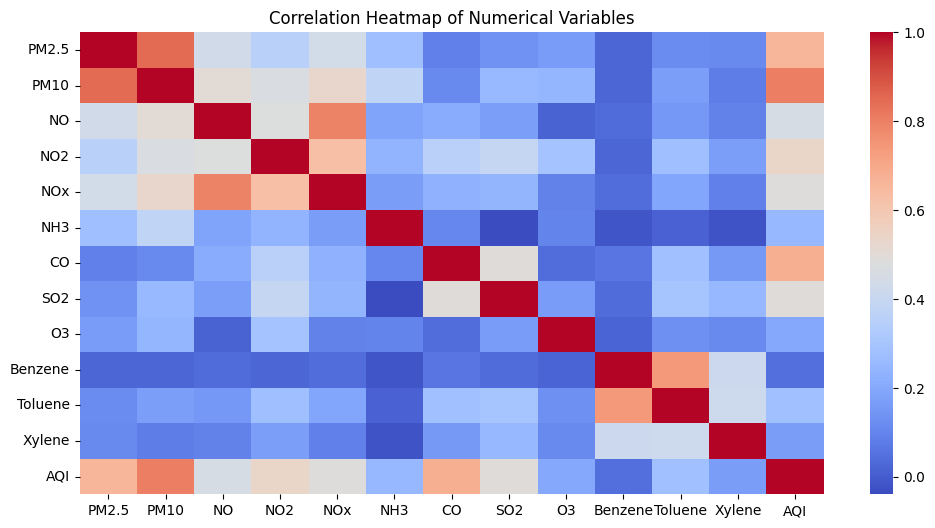

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

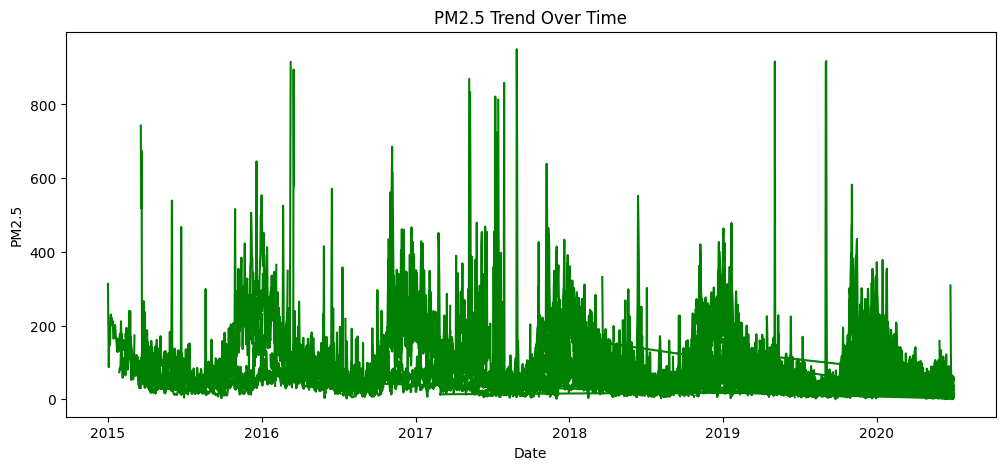

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(12,5))
plt.plot(df['Date'], df['PM2.5'], color='green')
plt.title('PM2.5 Trend Over Time')
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.show()


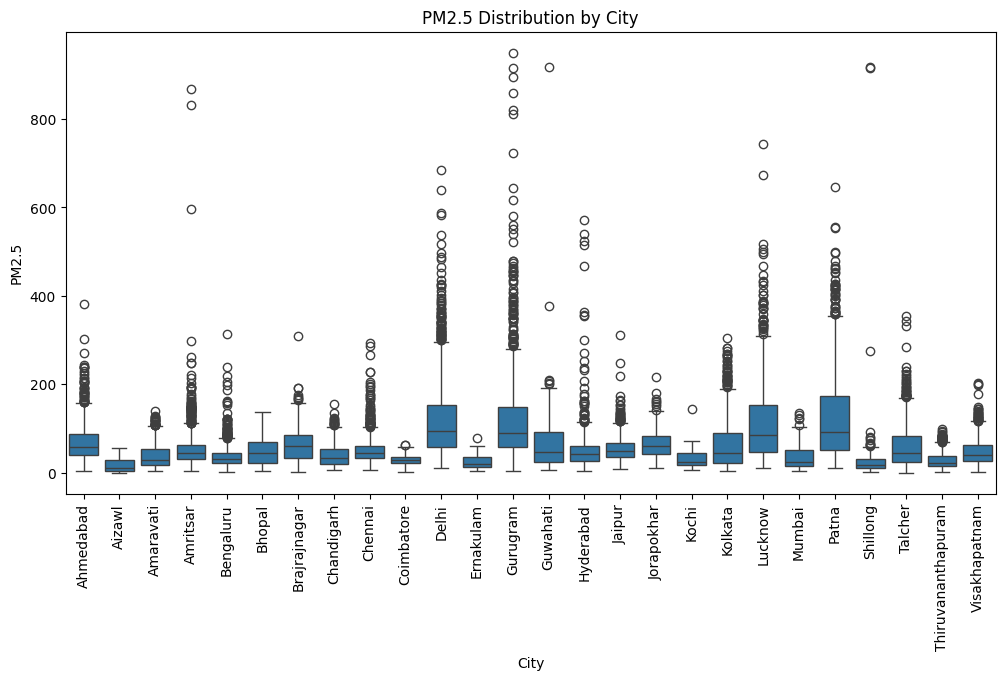

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='City', y='PM2.5', data=df)
plt.title('PM2.5 Distribution by City')
plt.xticks(rotation=90)
plt.show()


In [ ]:
# Variables predictoras (X) y variable objetivo (y)
X = df[['PM10', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3']]
y = df['PM2.5']


In [ ]:
# Remove rows with missing values in selected columns
data = df[['PM2.5', 'PM10', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3']].dropna()

# Update X and y with cleaned data
X = data[['PM10', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3']]
y = data['PM2.5']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([ 64.16511414,  34.58421725,  14.30798253, ...,  64.40803094,
       133.07133351,  43.60460547])

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

mae, mse, rmse, r2

(13.749389494371146,
 570.540255107189,
 np.float64(23.88598449106063),
 0.8056091241788228)

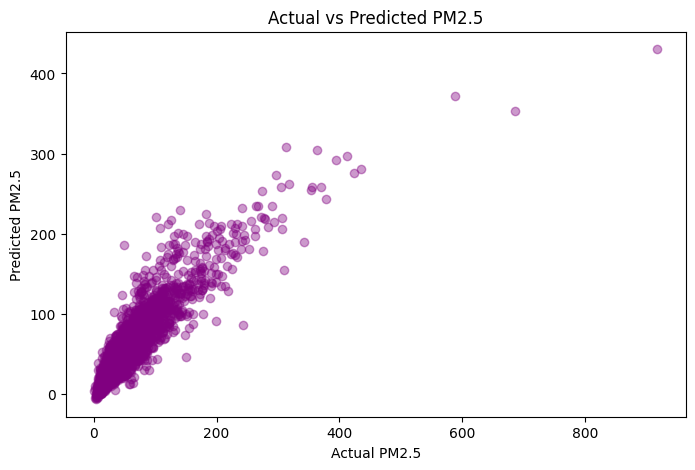

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.4, color='purple')
plt.title('Actual vs Predicted PM2.5')
plt.xlabel('Actual PM2.5')
plt.ylabel('Predicted PM2.5')
plt.show()

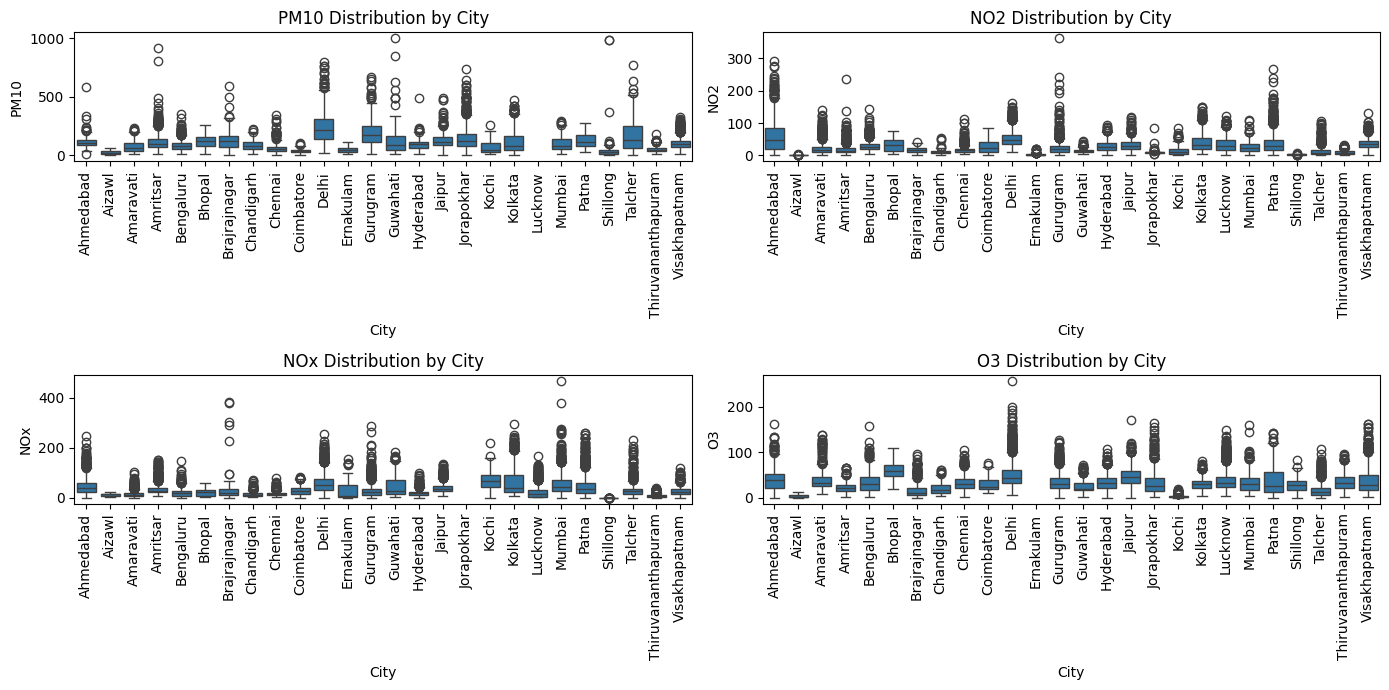

In [ ]:
# Boxplot de varios contaminantes por ciudad
plt.figure(figsize=(14,7))
contaminants = ['PM10', 'NO2', 'NOx', 'O3']

for i, var in enumerate(contaminants, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x='City', y=var)
    plt.xticks(rotation=90)
    plt.title(f'{var} Distribution by City')

plt.tight_layout()
plt.show()

In [ ]:
# Modelo adicional: Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

rf_mae = mean_absolute_error(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_pred)

rf_mae, rf_mse, rf_rmse, rf_r2

(9.94164661667248,
 299.5842173989249,
 np.float64(17.30850130424136),
 0.8979275557139471)

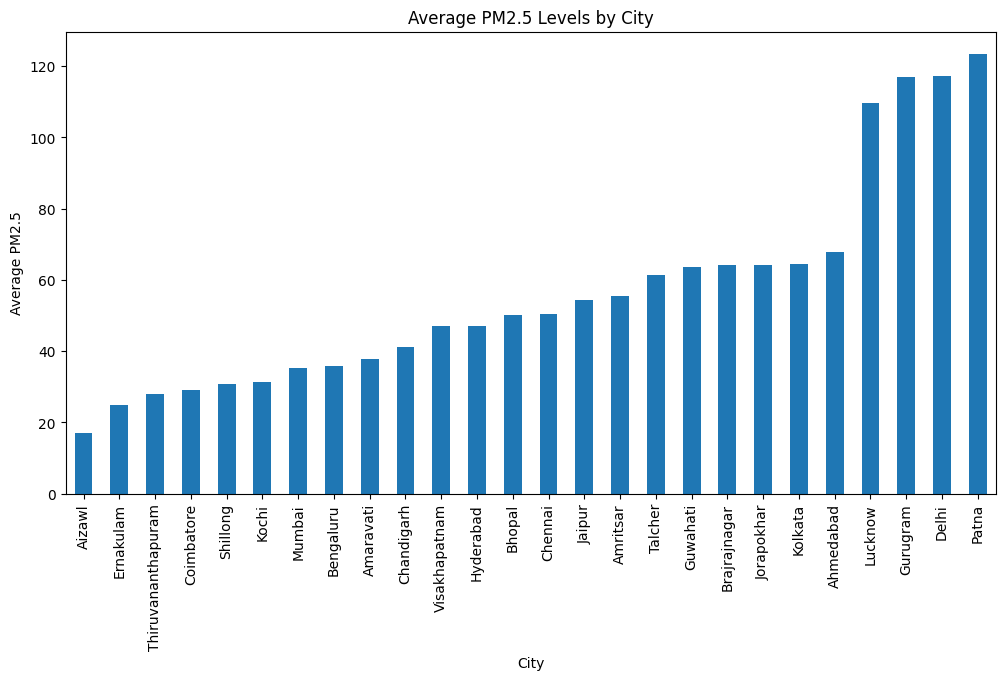

In [ ]:
# Promedio de PM2.5 por ciudad
plt.figure(figsize=(12,6))
city_mean = df.groupby('City')['PM2.5'].mean().sort_values()
city_mean.plot(kind='bar')
plt.title('Average PM2.5 Levels by City')
plt.xlabel('City')
plt.ylabel('Average PM2.5')
plt.xticks(rotation=90)
plt.show()

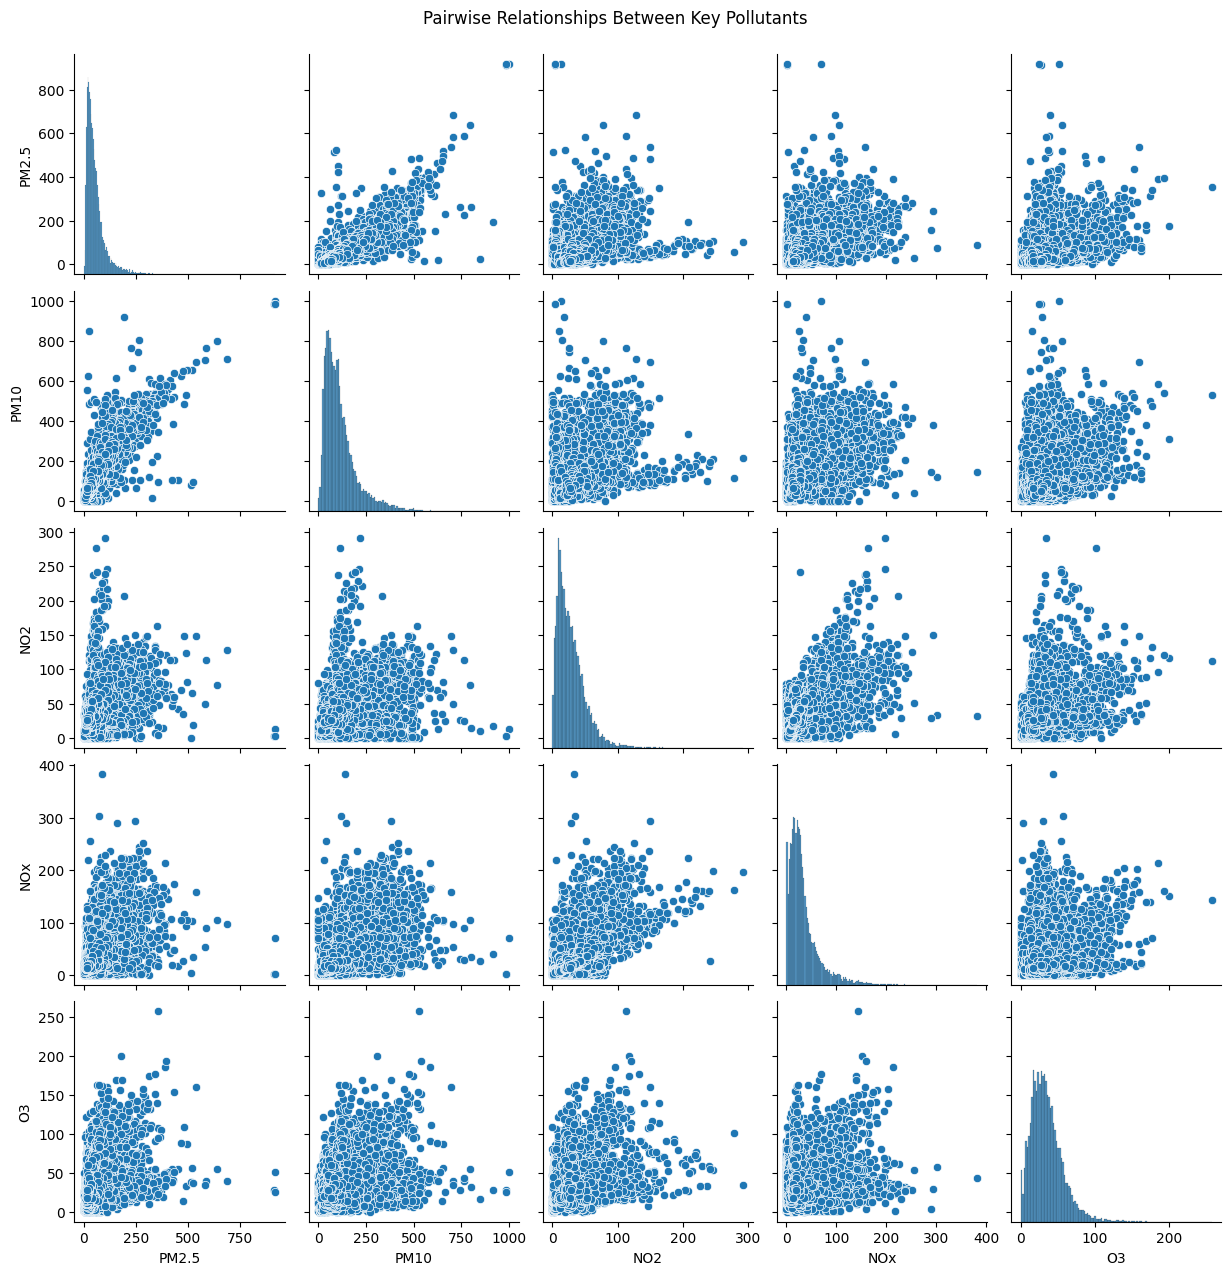

In [ ]:
# Pairplot de contaminantes relevantes
sns.pairplot(df[['PM2.5', 'PM10', 'NO2', 'NOx', 'O3']].dropna())
plt.suptitle("Pairwise Relationships Between Key Pollutants", y=1.02)
plt.show()